**تصویر به عنوان داده**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = np.array(plt.imread('./google10.png'))

In [ ]:
data.shape

(168, 299, 4)

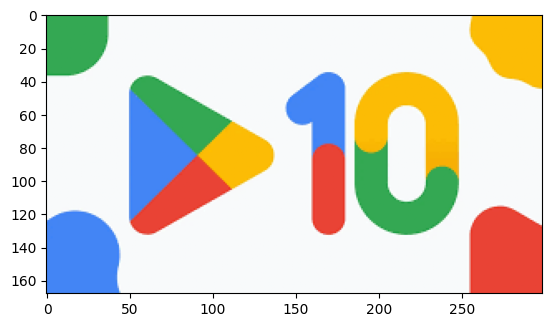

In [ ]:
plt.imshow(data)

### **انتخاب بخشی از تصویر**

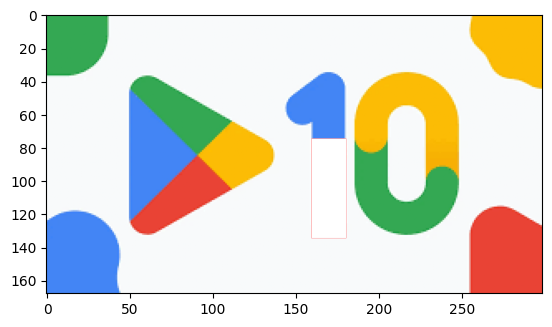

In [ ]:
data[75:135,160:181,:] = (255,0,0,0)
plt.imshow(data)

### **همرنگ کردن بخش انتخابی با رنگ بخش دیگری از تصویر**

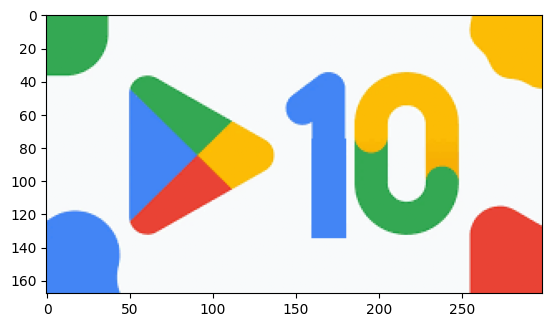

In [ ]:
data[75:135,160:181,:] = data[60,170,:]
plt.imshow(data)

### **رنگ کردن کل تصویر با مقدار خاص**

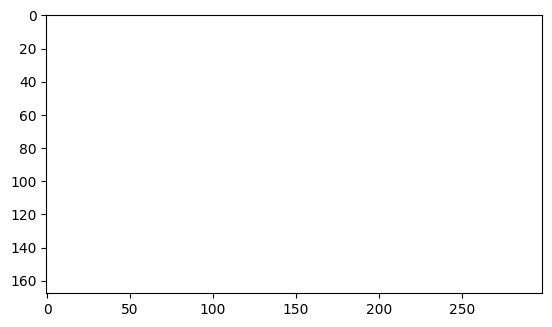

In [ ]:
data[:,:,:] = (0,0,110,0)
plt.imshow(data)

In [ ]:
!wget 'https://www.reuters.com/resizer/rSsKHo-sd16WX0IEISoq4yOO5aQ=/1080x0/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/J63FBX3CCJJQFKNN7UGBKUOCGA.jpg'

--2023-10-28 14:49:47--  https://www.reuters.com/resizer/rSsKHo-sd16WX0IEISoq4yOO5aQ=/1080x0/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/J63FBX3CCJJQFKNN7UGBKUOCGA.jpg
Resolving www.reuters.com (www.reuters.com)... 13.249.141.7, 13.249.141.116, 13.249.141.50, ...
Connecting to www.reuters.com (www.reuters.com)|13.249.141.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56553 (55K) [image/jpeg]
Saving to: ‘J63FBX3CCJJQFKNN7UGBKUOCGA.jpg’

J63FBX3CCJJQFKNN7UG 100%[===================>]  55.23K  --.-KB/s    in 0.04s   

2023-10-28 14:49:47 (1.51 MB/s) - ‘J63FBX3CCJJQFKNN7UGBKUOCGA.jpg’ saved [56553/56553]



In [ ]:
image1 = np.array(plt.imread('./google.jpg'))

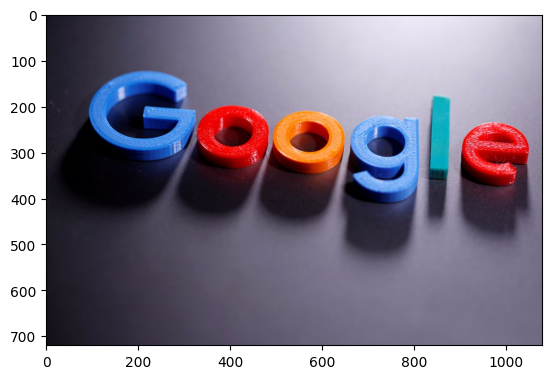

In [ ]:
image1.shape
plt.imshow(image1)

### **خاموش کردن کانالهای رنگی سبز و آبی**

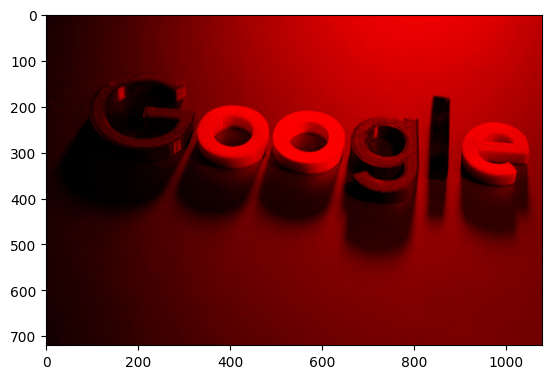

In [ ]:
image1[:,:,1] = 0
image1[:,:,2] = 0
plt.imshow(image1)

## **روش اول : تبدیل تصویر رنگی به سیاه و سفید و استفاده از فیلتر خاکستری **

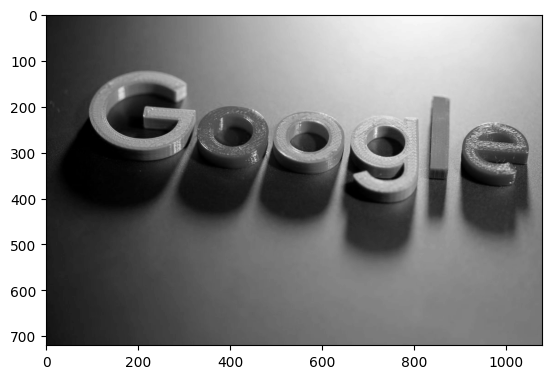

In [ ]:
image_grey = np.array(plt.imread('./google.jpg'))
image_grey = image_grey[...,0]//3 + image_grey[...,1]//3 + image_grey[...,2]//3
plt.imshow(image_grey, cmap='gray')

### **روش دوم : تبدیل تصویر رنگی به سیاه و سفید و استفاده از فیلتر خاکستری **

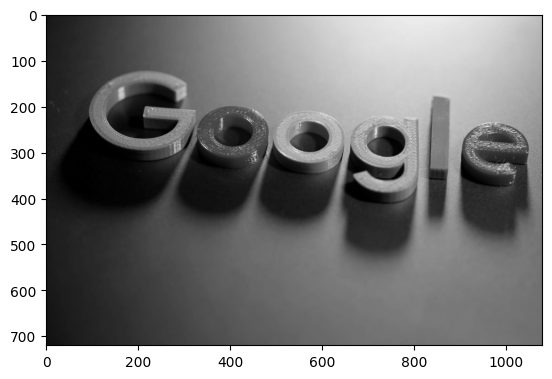

In [ ]:
import cv2

grey_opencv = cv2.imread('./google.jpg',0)
plt.imshow(grey_opencv, cmap='gray')

### **استفاده از مجموعه داده هدی و تغییر اندازه و شکل برای استفاده در الگوریتم‌های یادگیری ماشین**

In [ ]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2

In [ ]:
#!wget https://github.com/azii22000/ML-notebooks/raw/main/dataset/Data_hoda_full.mat

--2023-10-30 14:16:18--  https://github.com/azii22000/ML-notebooks/raw/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/azii22000/ML-notebooks/main/dataset/Data_hoda_full.mat [following]
--2023-10-30 14:16:19--  https://raw.githubusercontent.com/azii22000/ML-notebooks/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.08s   

2023-10-30 14:16:19 (47.6 MB/s) - ‘Data_hoda_full.mat’ saved [3989

### ** این مجموعه داده در قالب فایل mat متلب منتشر شده است. در پایتون میتوانیم آن را با کتابخانه scipy لود کنیم. **

In [ ]:
dataset = io.loadmat('./Data_hoda_full')
#dataset = np.loadtxt('./Data_hoda_full.mat')

In [ ]:
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [ ]:
#dataset['Data'].shape
dataset['labels'].shape

(60000, 1)

Text(0.5, 1.0, '4')

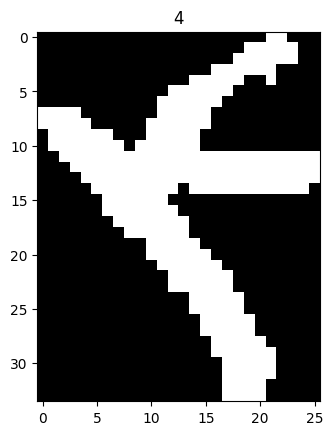

In [ ]:
i = 23
data = np.squeeze(dataset['Data'])
label = np.squeeze(dataset['labels'])
plt.imshow(data[i],cmap='gray')
plt.title(label[i])

در این مجموعه داده 60000 داده تصادفی وجود دارد.
برای آزمایشاتمان 1000 داده‌ی اول را برای آموزش و 200 داده‌ی بعدی را برای آزمون انتخاب می‌کنیم.
**داده های آزمون نباید قبلا در داده های آموزشی دیده شده باشند.** bold text

In [ ]:
 X_train_original = np.squeeze(dataset['Data'][:1000])
 y_train = np.squeeze(dataset['labels'][:1000])
 X_test_original = np.squeeze(dataset['Data'][1000:1200])
 y_test = np.squeeze(dataset['labels'][1000:1200])

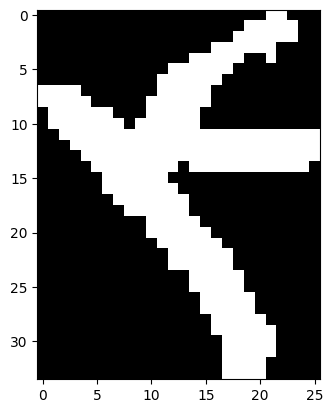

Label 23th image is: 4


In [ ]:
i = 23
image = X_train_original[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))


تغییر اندازه تصاویر مجموعه داده
اندازه تصاویر مجموعه داده متفاوت است.
تمام تصاویر را به یک اندازه مشخص (5*5) تغییر اندازه می‌دهیم.
### **bold text**

In [ ]:
#Image resize
X_train_5by5 = [cv2.resize(image,dsize=(5,5)) for image in X_train_original]
X_test_5by5  = [cv2.resize(image,dsize = (5,5)) for image in X_test_original]

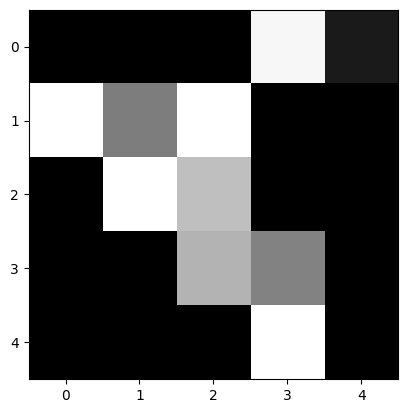

In [ ]:
image = X_train_5by5[23]
plt.imshow(image, cmap='gray')

## **برای اینکه دو بعدی بشود و scipy  آنرا بعتوان ورودی قبول کند آنها را تغییر سایز میدهیم **

In [ ]:
#Reshape
X_train = np.reshape(X_train_5by5,[-1,25])
X_test = np.reshape(X_test_5by5,[-1,25])

In [ ]:
print('X_train shape is :',X_train.shape)
print('X_test shape is :',X_test.shape)

X_train shape is : (1000, 25)
X_test shape is : (200, 25)


In [ ]:
|